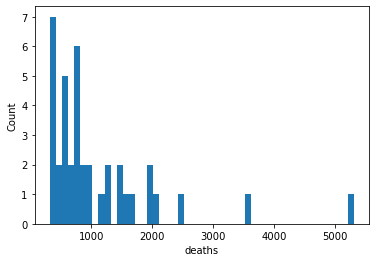

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import random
import statsmodels.api as sm

file='us-counties-2022.csv'
dat=pd.read_csv(file, header=0)
# print(dat)


plt.figure(1)
deaths=np.array(dat['deaths'])
plt.hist(deaths, bins=50);
plt.xlabel("deaths");
plt.ylabel("Count");


# plt.figure(2)
# plt.hist(t, bins = 100);
# plt.xlabel("t statistic");
# plt.ylabel("count");

cases=np.array(dat['cases'])
Mort=deaths/cases*100
# print(Mort)
# print(cases)
# print(deaths)

The y intercept of Percent male vs Mortality Rate is =
0.02021959856755875
The slope of Percent male vs Mortality Rate is =
0.031430117646494074
The y intercept of Poverty vs Mortality Rate is =
0.07987000370913327
The slope of Poverty vs Mortality Rate is =
0.12483134072628367
The y intercept for the discrete plot of group 1 less than 49% male and group 2 greater than or equal to 49% male =
1.5737690981898609


C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_38588\1930955241.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Covid['MaleGroup'].loc[Covid['Percent Males']<49]=0.
C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_38588\1930955241.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Covid['MaleGroup'].loc[Covid['Percent Males']>=49]=1.
C:\Users\ckoscho.PROCESSCOMBUST\AppData\Local\Temp\ipykernel_38588\1930955241.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

The slope for the discrete plot of group 1 less than 49% male and group 2 greater than or equal to 49% male =
-0.02539065768397164
The y intercept for the discrete plot of group 1 less than 10% poverty and group 2 greater than or equal to 10% poverty =
1.412001580282191
The slope for the discrete plot of group 1 less than 10% poverty and group 2 greater than or equal to 10% poverty =
0.21433092790630437
The y intercept for the discrete plot of group 1 less than 49% male and less than 10% poverty and group 2 greater than or equal to 49% male and greater than or equal to 10% poverty level=
1.464104705207376
The slope for the discrete plot of group 1 less than 49% male and less than 10% poverty and group 2 greater than or equal to 49% male and greater than or equal to 10% poverty level =
0.19669901408231752


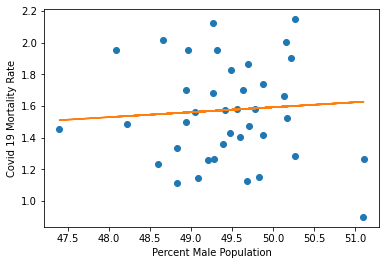

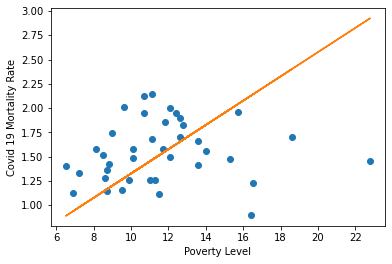

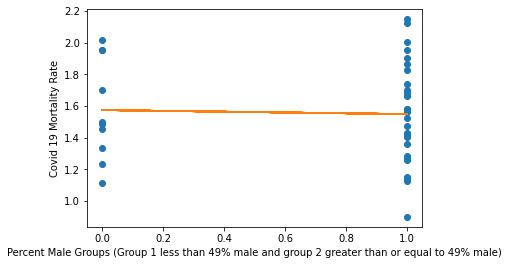

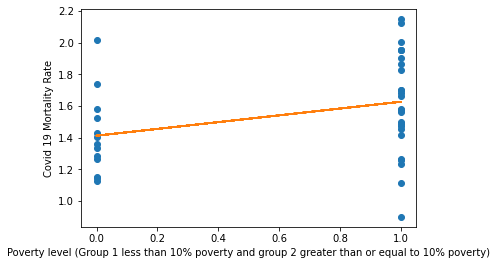

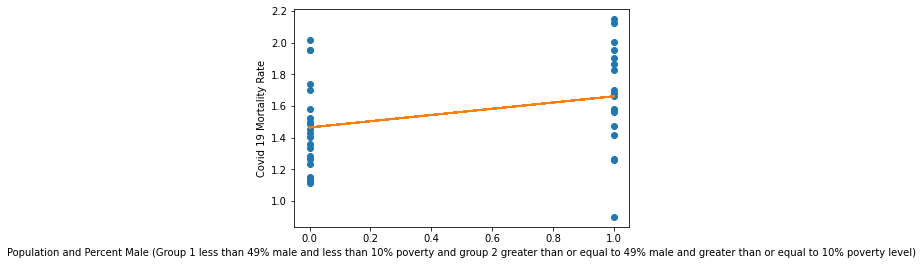

In [12]:
file='Poverty Pennsylvania.csv'
dat=pd.read_csv(file, header=0)
# print(dat)
shape=dat.shape[1]
# print(shape)
numcounties = int((shape-1)/6)
# print(numcounties)

pop=np.zeros(numcounties)
male=np.zeros(numcounties)
pov=np.zeros(numcounties)
counties=list(np.zeros(numcounties))
# print(pov)


# Extract the total population of both males and females within the 39 counties of Pennsylvania that are considered in poverty.
# Extract male populaion considered poverty level.
# Extract population percentage considered to be in poverty for each of 39 counties listed in Pennsylvania.
# Extract each column header (county name)

for i in range(numcounties):
#     print(i)
    pop[i]=np.array(dat.iloc[0][1+6*i].replace(',',''))
    
    male[i]=np.array(dat.iloc[2][1+6*i].replace(',',''))
   
    pov[i]=np.array(dat.iloc[0][5+6*i].replace(',','').replace('%',''))
    
    counties[i]=(dat.columns[1+6*i].split(' ')[0])
    
Percentmale=(male/pop*100)
# print(Percentmale)
# print(Mort)
# =====================Plot continuoues data=================================
# Plot Percent male vs Covid mortality rate
plt.figure(1)
plt.plot(Percentmale, Mort, 'o')
plt.xlabel("Percent Male Population");
plt.ylabel("Covid 19 Mortality Rate");

# Regression of percent male vs mortality rate.
x=sm.add_constant(Mort)
model=sm.OLS(x, Percentmale).fit()
# print(model.summary())
# print(model.params)


parameters=model.params[0]
intc=parameters[0]
slope=parameters[1]
print('The y intercept of Percent male vs Mortality Rate is =')
print(intc)
print('The slope of Percent male vs Mortality Rate is =')
print(slope)
plt.plot(Percentmale,slope*Percentmale+intc)


# Plot Poverty level vs covid mortality rate
plt.figure(2)
plt.plot(pov, Mort, 'o')
plt.xlabel("Poverty Level");
plt.ylabel("Covid 19 Mortality Rate");

# Regression of poverty level vs mortality rate.
x=sm.add_constant(Mort)
model=sm.OLS(x, pov).fit()
# print(model.summary())
# print(model.params)


parameters=model.params[0]
intc=parameters[0]
slope=parameters[1]
print('The y intercept of Poverty vs Mortality Rate is =')
print(intc)
print('The slope of Poverty vs Mortality Rate is =')
print(slope)
plt.plot(pov,slope*pov+intc)

# =====================Plot discrete data=================================
Covid=pd.DataFrame([pov, Percentmale, Mort], ['Poverty level','Percent Males','Covid Mortality Rate'], counties)
Covid=Covid.transpose()
Covid['povGroup'] =''
# print(Covid)
Covid['MaleGroup'] =''
# print(Covid)
Covid['CombinedGroup'] =''
# print(Covid)

Covid['MaleGroup'].loc[Covid['Percent Males']<49]=0.
Covid['MaleGroup'].loc[Covid['Percent Males']>=49]=1.
Covid['povGroup'].loc[Covid['Poverty level']<10]=0.
Covid['povGroup'].loc[Covid['Poverty level']>=10]=1.
Covid['CombinedGroup']=0
Covid['CombinedGroup'].loc[(Covid['povGroup']==1) & (Covid['MaleGroup']==1)]=1

# print(Covid)

# Plot discrete for group 1 less than 49% male and group 2 greater than 49% percent male.
plt.figure(3)
plt.plot(Covid['MaleGroup'],Covid['Covid Mortality Rate'],'o')
plt.xlabel("Percent Male Groups (Group 1 less than 49% male and group 2 greater than or equal to 49% male)");
plt.ylabel("Covid 19 Mortality Rate");

# Regress data
X = np.c_[np.ones(39),np.array(Covid['MaleGroup'], dtype='float64')]
# print(X)
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
intc, slope = tmp @ np.transpose(X) @ np.array(Covid['Covid Mortality Rate'])

# x=sm.add_constant(np.array(Covid['MaleGroup']))
# model=sm.OLS(np.array(Covid['Covid Mortality Rate']), x).fit()
# print('model.params =')
# print(model.params)

# intc=model.params[0]
# slope=model.params[1]

#Plot regressed trendline
print('The y intercept for the discrete plot of group 1 less than 49% male and group 2 greater than or equal to 49% male =')
print(intc)
print('The slope for the discrete plot of group 1 less than 49% male and group 2 greater than or equal to 49% male =')
print(slope)
plt.plot(Covid['MaleGroup'], slope*Covid['MaleGroup']+intc)

# ========================================================
# Plot discrete for group 1 less than 10% Poverty level and group 2 greater than 10% Poverty level.
plt.figure(4)
plt.plot(Covid['povGroup'],Covid['Covid Mortality Rate'],'o')
plt.xlabel("Poverty level (Group 1 less than 10% poverty and group 2 greater than or equal to 10% poverty)");
plt.ylabel("Covid 19 Mortality Rate");

X = np.c_[np.ones(39),np.array(Covid['povGroup'], dtype='float64')]
# print(X)
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
intc, slope = tmp @ np.transpose(X) @ np.array(Covid['Covid Mortality Rate'])

print('The y intercept for the discrete plot of group 1 less than 10% poverty and group 2 greater than or equal to 10% poverty =')
print(intc)
print('The slope for the discrete plot of group 1 less than 10% poverty and group 2 greater than or equal to 10% poverty =')
print(slope)
plt.plot(Covid['povGroup'], slope*Covid['povGroup']+intc)
# ========================================================
#Plot groups of above 49% male and above 10% poverty level.
plt.figure(5)
plt.plot(Covid['CombinedGroup'],Covid['Covid Mortality Rate'],'o')
plt.xlabel("Population and Percent Male (Group 1 less than 49% male and less than 10% poverty and group 2 greater than or equal to 49% male and greater than or equal to 10% poverty level)");
plt.ylabel("Covid 19 Mortality Rate");

#Regression of above 49% male and above 10% poverty level.
X = np.c_[np.ones(39),np.array(Covid['CombinedGroup'], dtype='float64')]
# print(X)
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))
intc, slope = tmp @ np.transpose(X) @ np.array(Covid['Covid Mortality Rate'])

print('The y intercept for the discrete plot of group 1 less than 49% male and less than 10% poverty and group 2 greater than or equal to 49% male and greater than or equal to 10% poverty level=')
print(intc)
print('The slope for the discrete plot of group 1 less than 49% male and less than 10% poverty and group 2 greater than or equal to 49% male and greater than or equal to 10% poverty level =')
print(slope)
plt.plot(Covid['CombinedGroup'], slope*Covid['CombinedGroup']+intc)
